# SPMKP

### Import Library

In [249]:
import mysql.connector as mysql
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb

### Konek Database

In [250]:
db_connection = mysql.connect(host = "10.4.19.15", 
                            database = 'mpninfo', 
                            user = 'indra', 
                            password= 'indra', 
                            port = 3306)

### QUERY

In [251]:
query = '''
SELECT * FROM SPMKP;
'''

### EXECUTE

In [252]:
spmkp = pd.read_sql(query, db_connection)
spmkp.tanggal = pd.to_datetime(spmkp.tanggal)
spmkp.head()

,id,admin,npwp,kpp,cabang,kdmap,bulan,tahun,tanggal,nominal
0,479871,007,013629035,007,000,411126,4,2021,2021-04-28,1.105107e+09
1,479870,007,025088980,007,000,411122,4,2021,2021-04-28,2.512000e+06
2,479869,007,013533062,007,000,411126,4,2021,2021-04-27,1.197722e+09
3,479868,007,728622341,004,000,411126,4,2021,2021-04-27,9.001105e+09
4,479867,007,025088378,003,000,411211,4,2021,2021-04-23,2.895277e+09


### ADD, DROP, URUTKAN

In [253]:
spmkp['npwpfull']= spmkp.npwp + spmkp.kpp + spmkp.cabang
spmkp = spmkp.drop(['id','admin','npwp','kpp','cabang'], axis=1)
spmkp = spmkp[['npwpfull','tanggal','bulan','tahun','kdmap','nominal']]
spmkp.head()

,npwpfull,tanggal,bulan,tahun,kdmap,nominal
0,013629035007000,2021-04-28,4,2021,411126,1.105107e+09
1,025088980007000,2021-04-28,4,2021,411122,2.512000e+06
2,013533062007000,2021-04-27,4,2021,411126,1.197722e+09
3,728622341004000,2021-04-27,4,2021,411126,9.001105e+09
4,025088378003000,2021-04-23,4,2021,411211,2.895277e+09


## SELEKSI

### 2021

In [255]:
spmkp = spmkp.loc[(spmkp['tanggal']) >'2020-12-31']
spmkp.head()

,npwpfull,tanggal,bulan,tahun,kdmap,nominal
0,013629035007000,2021-04-28,4,2021,411126,1.105107e+09
1,025088980007000,2021-04-28,4,2021,411122,2.512000e+06
2,013533062007000,2021-04-27,4,2021,411126,1.197722e+09
3,728622341004000,2021-04-27,4,2021,411126,9.001105e+09
4,025088378003000,2021-04-23,4,2021,411211,2.895277e+09


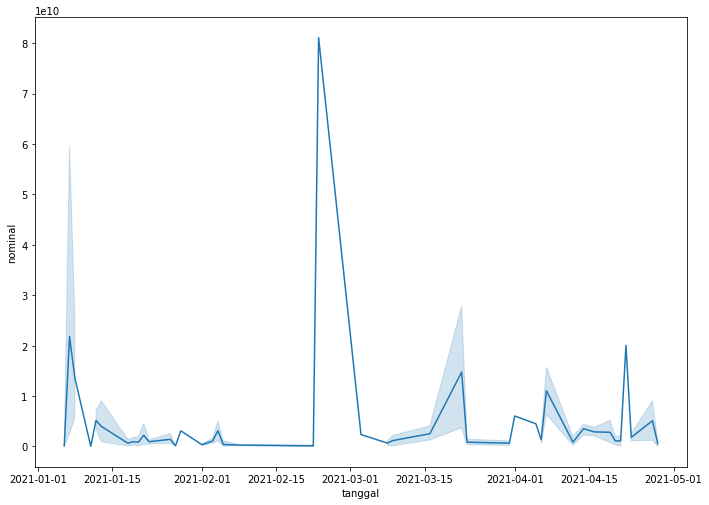

In [256]:
plt.figure(figsize=(11.7,8.27))
grafik = sb.lineplot(x= 'tanggal', y= 'nominal', data = spmkp);

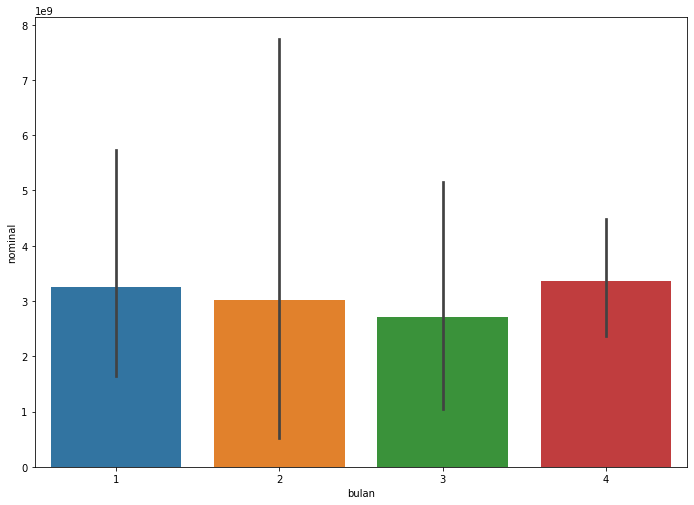

In [244]:
plt.figure(figsize=(11.7,8.27))
bulanan = sb.barplot(x= 'bulan', y='nominal', data=spmkp)

In [245]:
report_bulan = spmkp.groupby('bulan').sum()
report_bulan

,tahun,nominal
bulan,,
1,165722,2.663868e+11
2,72756,1.083592e+11
3,52546,7.050513e+10
4,133386,2.214766e+11


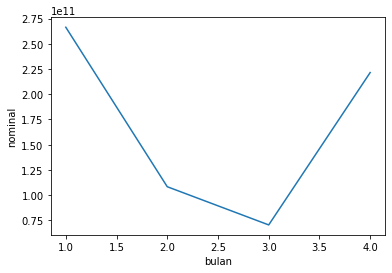

In [246]:
report_bulan = report_bulan.reset_index()
sb.lineplot(data=report_bulan, x='bulan', y='nominal', legend='full');